## 대회 소개
- 출처 : 캐글
    - 문제 제공자 : Bosch
- 문제 개요 : 제조 공정 데이터를 기반으로 불량 여부 예측
- 공정 패턴에 따른 결측이 반드시 존재하는 상황이어서, 특징 추출이 매우 중요한 상황임

## 사용 데이터
- train_numeric / test_numeric: 공정 데이터 중 수치형 변수만 포함
    - L생산라인_S스테이션_F특징번호와 같이 센서 관련 특징이 총 969개가 있음(예: L3_S36_F3939)
    - 특정 생산라인, 스테이션을 거치지 않은 경우에는 해당하는 특징이 모두 결측
    - Response: 불량여부(1: 불량, 0: 양품)

- train_categorical / test_categorical: 공정 데이터 중 범주형 변수만 포함
    - L생산라인_S스테이션_F특징번호와 같이 범주형 데이터가 총 2140개로 구성 (예: L3_S36_F3939)
    - 특정 생산라인, 스테이션을 거치지 않은 경우에는 해당하는 특징이 모두 결측

## 사용 데이터의 특징
- 비식별화된 특징이 매우 많음
- 전체 데이터 가운데, 결측치가 매우 많음
- 심각한 클래스 불균형 문제 존재

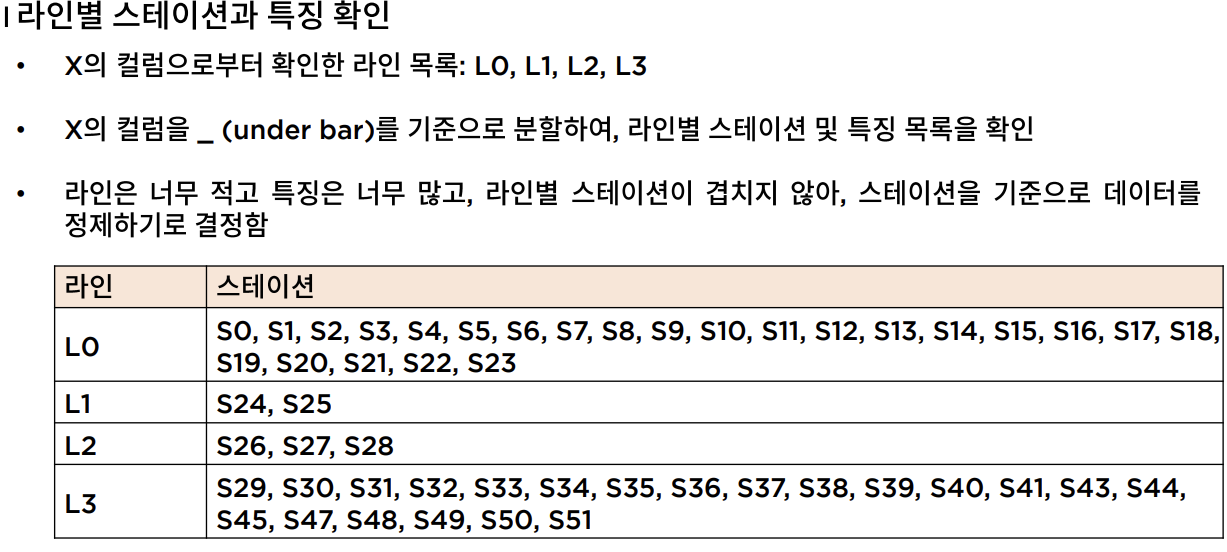

In [2]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-6.-실전-머신러닝-프로젝트\6. 실전 머신러닝 프로젝트\26. Bosch Production Line Performance\데이터')

## 수치형 데이터 정제

#### 데이터 불러오기 및 기본 설정

In [3]:
df = pd.read_csv('sampled_train_numeric.csv')

In [4]:
df.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.set_index('Id', inplace = True)

In [7]:
df.head()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
Id,,,,,,,,,,,,,,,,,,,,,
4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
X = df.drop('Response', axis = 1)
Y = df['Response']

#### 라인별 스테이션과 특징 확인

In [14]:
# 라인별 스테이션과 특징 확인
line_station_feature_dict = dict()
line_station_feature_dict['L0'] = {"station":[], "feature":[]}
line_station_feature_dict['L1'] = {"station":[], "feature":[]}
line_station_feature_dict['L2'] = {"station":[], "feature":[]}
line_station_feature_dict['L3'] = {"station":[], "feature":[]}

for col in X.columns[:-1]:
    line, station, feature = col.split('_')
    if station not in line_station_feature_dict[line]['station']:
        line_station_feature_dict[line]['station'].append(station)

    if feature not in line_station_feature_dict[line]["feature"]:
        line_station_feature_dict[line]["feature"].append(feature)

In [12]:
# 라인별 스테이션 확인 (라인별 스테이션이 겹치는 것이 전부 없음을 확인)
# L0: S0 ~ S23
# L1: S24 ~ S25
# L2: S26 ~ S28
# L3: S29 ~ S51
for line in ['L0', 'L1', 'L2', 'L3']:
    print(line_station_feature_dict[line]["station"])

['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23']
['S24', 'S25']
['S26', 'S27', 'S28']
['S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S43', 'S44', 'S45', 'S47', 'S48', 'S49', 'S50', 'S51']


In [15]:
# 라인별 특징 확인
# L0: F2 ~ F671
# L1: F679 ~ F3034
# L2: F3036 ~ F3311
# L3: F3315 ~ F4262
for line in ['L0', 'L1', 'L2', 'L3']:
    print(line_station_feature_dict[line]["feature"])

['F0', 'F2', 'F4', 'F6', 'F8', 'F10', 'F12', 'F14', 'F16', 'F18', 'F20', 'F22', 'F24', 'F28', 'F32', 'F36', 'F40', 'F44', 'F48', 'F52', 'F56', 'F60', 'F64', 'F68', 'F72', 'F76', 'F80', 'F84', 'F88', 'F92', 'F96', 'F100', 'F104', 'F109', 'F114', 'F116', 'F118', 'F122', 'F132', 'F136', 'F138', 'F142', 'F144', 'F146', 'F149', 'F155', 'F160', 'F165', 'F170', 'F175', 'F180', 'F185', 'F190', 'F195', 'F200', 'F205', 'F210', 'F219', 'F224', 'F229', 'F234', 'F239', 'F244', 'F249', 'F254', 'F259', 'F264', 'F269', 'F274', 'F282', 'F286', 'F290', 'F294', 'F298', 'F302', 'F306', 'F310', 'F314', 'F318', 'F322', 'F326', 'F330', 'F332', 'F334', 'F336', 'F338', 'F340', 'F342', 'F344', 'F346', 'F348', 'F350', 'F352', 'F354', 'F356', 'F358', 'F362', 'F366', 'F370', 'F374', 'F378', 'F382', 'F386', 'F390', 'F394', 'F397', 'F400', 'F403', 'F406', 'F409', 'F412', 'F415', 'F418', 'F421', 'F426', 'F431', 'F433', 'F435', 'F439', 'F449', 'F453', 'F455', 'F459', 'F461', 'F463', 'F466', 'F472', 'F477', 'F482', 'F4

In [16]:
# 제품별 거쳐간 라인 추출: 결측이 아닌 부분의 컬럼 값 가져오기
not_null_columns = X.columns[X.iloc[0].notnull()] # 핵심 코드
not_null_columns

Index(['L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8', 'L0_S0_F10',
       'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16', 'L0_S0_F18',
       ...
       'L3_S35_F3894', 'L3_S35_F3896', 'L3_S35_F3898', 'L3_S35_F3903',
       'L3_S35_F3908', 'L3_S35_F3913', 'L3_S37_F3944', 'L3_S37_F3946',
       'L3_S37_F3948', 'L3_S37_F3950'],
      dtype='object', length=162)

In [17]:
pd.Series(not_null_columns).str.split('_', expand = True)

,0,1,2
0,L0,S0,F0
1,L0,S0,F2
2,L0,S0,F4
3,L0,S0,F6
4,L0,S0,F8
...,...,...,...
157,L3,S35,F3913
158,L3,S37,F3944
159,L3,S37,F3946
160,L3,S37,F3948


In [23]:
# 데이터의 일부만 확인 수행
num_iter = 0

for ind, row in X.iterrows():
    if sum(row.notnull()) > 0:
        not_null_columns = X.columns[row.notnull()]
        lines = pd.Series(not_null_columns).str.split('_',expand = True).iloc[:,0].drop_duplicates().tolist()
        stations = pd.Series(not_null_columns).str.split('_', expand = True).iloc[:, 1].drop_duplicates().tolist()
        
        print(ind, lines, stations)
        
        if num_iter > 20: # 20개만 확인하기 위함 ==> 제품별로 거쳐간 라인 및 스테이션이 다름을 확인
            break
    num_iter += 1

4 ['L0', 'L3'] ['S0', 'S1', 'S2', 'S4', 'S7', 'S8', 'S11', 'S29', 'S30', 'S31', 'S33', 'S34', 'S35', 'S37']
6 ['L0', 'L3'] ['S12', 'S13', 'S14', 'S16', 'S18', 'S20', 'S21', 'S29', 'S30', 'S33', 'S34', 'S35', 'S37']
7 ['L0', 'L3'] ['S0', 'S1', 'S2', 'S5', 'S6', 'S8', 'S10', 'S29', 'S30', 'S33', 'S34', 'S35', 'S37']
9 ['L0', 'L3'] ['S0', 'S1', 'S2', 'S4', 'S7', 'S8', 'S10', 'S29', 'S30', 'S33', 'S34', 'S36', 'S37']
11 ['L0', 'L3'] ['S0', 'S1', 'S3', 'S4', 'S7', 'S8', 'S11', 'S29', 'S30', 'S33', 'S34', 'S36', 'S37']
13 ['L0', 'L3'] ['S0', 'S1', 'S3', 'S4', 'S7', 'S8', 'S10', 'S29', 'S30', 'S33', 'S34', 'S36', 'S37']
14 ['L0', 'L3'] ['S12', 'S13', 'S15', 'S17', 'S19', 'S20', 'S22', 'S29', 'S30', 'S33', 'S34', 'S35', 'S37']
16 ['L1', 'L2', 'L3'] ['S24', 'S26', 'S29', 'S30', 'S33', 'S34', 'S35', 'S37']
18 ['L0', 'L3'] ['S0', 'S1', 'S2', 'S4', 'S7', 'S8', 'S10', 'S29', 'S30', 'S33', 'S34', 'S36', 'S37']
23 ['L0', 'L3'] ['S12', 'S13', 'S14', 'S17', 'S18', 'S20', 'S21', 'S29', 'S30', 'S33', 'S3

#### 거쳐간 스테이션 특징 추출

In [25]:
# 전체 스테이션 목록 정의
import numpy as np
whole_stations = []
for line in ['L0', 'L1', 'L2', 'L3']:
    whole_stations += line_station_feature_dict[line]['station']
    
print(whole_stations)

['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S43', 'S44', 'S45', 'S47', 'S48', 'S49', 'S50', 'S51']


In [26]:
# station_X: 제품별 거쳐간 station을 나타내는 데이터
station_X = []
for ind, row in X.iterrows():
    if sum(row.notnull()) == 0:
        station_X.append(np.zeros(len(whole_stations))) # whole stations에 포함된 stations를 추가 
    else:
        not_null_columns = X.columns[row.notnull()]
        stations = pd.Series(not_null_columns).str.split('_', expand = True).iloc[:, 1].drop_duplicates().tolist()

        station_X.append(np.isin(whole_stations, stations)) # whole stations에 포함된 stations를 추가 

station_X = pd.DataFrame(station_X,
             index = X.index,
             columns = whole_stations)

station_X = station_X.astype(int)
station_X

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S40,S41,S43,S44,S45,S47,S48,S49,S50,S51
Id,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11,1,1,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19915,1,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
19917,1,1,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


#### 측정된 값의 통계량 추출

In [27]:
from scipy import stats

In [28]:
def remove_outliers(val, w = 1.5):
    Q1 = np.quantile(val, 0.25)
    Q3 = np.quantile(val, 0.75)
    IQR = Q3 - Q1    
    cond1 = Q1 - w * IQR < val
    cond2 = Q3 + w * IQR > val
    total_cond = np.logical_and(cond1, cond2)  # cond1 & cond2  
    return val[total_cond]

In [29]:
def extract_statistical_features(val): # val: 하나의 행
    if val.notnull().sum() == 0: # 측정된 값이 하나도 없는 경우에는 전부 0으로 return
        return pd.Series([0] * 6)
    else:
        val = val.copy().dropna() # 결측 제거
        val = remove_outliers(val) # 이상치 제거
        val_mean = val.mean() # 평균
        val_var = val.var() # 분산
        val_max = val.max() # 최대
        val_min = val.min() # 최소
        val_kurtosis = stats.kurtosis(val)
        val_RMS = np.sqrt(sum(val ** 2 / len(val)))

        # Sereis로 return한 이유: 데이터프레임을 원활히 구성하기 위함
        # list로 return하면 index가 Id이고, data가 리스트인 구조로 정의됨
        return pd.Series([val_mean, val_var, val_max, val_min, val_kurtosis, val_RMS])

In [30]:
stat_feature_X = X.apply(extract_statistical_features, axis = 1)
stat_feature_X.rename({0:"mean", 1: "variance", 2:"max", 3:"min", 4:"kurtosis", 5:"RMS"}, axis = 1, inplace = True)

In [31]:
stat_feature_X.head()

,mean,variance,max,min,kurtosis,RMS
Id,,,,,,
4,-0.013346,0.003363,0.118,-0.164,0.415134,0.059297
6,-0.002573,0.001208,0.096,-0.088,0.632356,0.034741
7,0.001774,0.000579,0.064,-0.060,1.093244,0.024048
9,-0.000248,0.000928,0.079,-0.084,0.837443,0.030357
11,-0.014000,0.003128,0.118,-0.157,0.315412,0.057489


#### 기존 데이터 삭제 및 정제된 데이터 병합

In [34]:
numeric_X = pd.merge(station_X, stat_feature_X, left_index = True, right_index = True)
numeric_X.head()

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S48,S49,S50,S51,mean,variance,max,min,kurtosis,RMS
Id,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,-0.013346,0.003363,0.118,-0.164,0.415134,0.059297
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.002573,0.001208,0.096,-0.088,0.632356,0.034741
7,1,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0.001774,0.000579,0.064,-0.060,1.093244,0.024048
9,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,-0.000248,0.000928,0.079,-0.084,0.837443,0.030357
11,1,1,0,1,1,0,0,1,1,0,...,0,0,0,0,-0.014000,0.003128,0.118,-0.157,0.315412,0.057489


### 범주형 데이터 처리

In [37]:
df = pd.read_csv("sampled_train_categorical.csv")
df.set_index('Id', inplace = True)

In [38]:
df.head()

,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,L0_S2_F43,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
Id,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.iloc[0].dropna().unique() # 0번째 레코드는 전부 결측

array([], dtype=object)

In [40]:
df.iloc[2].dropna().unique() # 2번째 레코드는 전부 T1 code가 발생

array(['T1'], dtype=object)

In [41]:
# S29에서만 발생한 값임을 확인 ==> station 별로 등장한 값들을 확인해보자!
df.iloc[2].dropna().index

Index(['L3_S29_F3317', 'L3_S29_F3320', 'L3_S29_F3323', 'L3_S29_F3326',
       'L3_S29_F3329', 'L3_S29_F3332', 'L3_S29_F3335', 'L3_S29_F3338',
       'L3_S29_F3341', 'L3_S29_F3344', 'L3_S29_F3347', 'L3_S29_F3350',
       'L3_S29_F3353', 'L3_S29_F3356', 'L3_S29_F3359', 'L3_S29_F3362',
       'L3_S29_F3364', 'L3_S29_F3366', 'L3_S29_F3369', 'L3_S29_F3372',
       'L3_S29_F3375', 'L3_S29_F3378', 'L3_S29_F3381', 'L3_S29_F3384',
       'L3_S29_F3387', 'L3_S29_F3390', 'L3_S29_F3392', 'L3_S29_F3394',
       'L3_S29_F3397', 'L3_S29_F3400', 'L3_S29_F3403', 'L3_S29_F3406',
       'L3_S29_F3409', 'L3_S29_F3411', 'L3_S29_F3414', 'L3_S29_F3416',
       'L3_S29_F3418', 'L3_S29_F3420', 'L3_S29_F3423', 'L3_S29_F3426',
       'L3_S29_F3429', 'L3_S29_F3432', 'L3_S29_F3435', 'L3_S29_F3438',
       'L3_S29_F3441', 'L3_S29_F3444', 'L3_S29_F3446', 'L3_S29_F3448',
       'L3_S29_F3451', 'L3_S29_F3454', 'L3_S29_F3457', 'L3_S29_F3460',
       'L3_S29_F3463', 'L3_S29_F3466', 'L3_S29_F3469', 'L3_S29_F3472',
      

In [42]:
df.iloc[50].dropna().unique() # 50번째 레코드는 T1, T145가 발생

array(['T1', 'T145'], dtype=object)

In [43]:
# S26과 S29에서 발생함을 확인
df.iloc[50].dropna().index

Index(['L2_S26_F3038', 'L2_S26_F3042', 'L2_S26_F3045', 'L2_S26_F3049',
       'L2_S26_F3053', 'L2_S26_F3057', 'L2_S26_F3060', 'L2_S26_F3064',
       'L2_S26_F3067', 'L2_S26_F3071', 'L2_S26_F3075', 'L2_S26_F3079',
       'L2_S26_F3082', 'L2_S26_F3085', 'L2_S26_F3088', 'L2_S26_F3091',
       'L2_S26_F3094', 'L2_S26_F3097', 'L2_S26_F3099', 'L2_S26_F3101',
       'L2_S26_F3104', 'L2_S26_F3108', 'L2_S26_F3111', 'L2_S26_F3115',
       'L2_S26_F3119', 'L2_S26_F3123', 'L2_S26_F3127', 'L3_S29_F3317',
       'L3_S29_F3320', 'L3_S29_F3323', 'L3_S29_F3326', 'L3_S29_F3329',
       'L3_S29_F3332', 'L3_S29_F3335', 'L3_S29_F3338', 'L3_S29_F3341',
       'L3_S29_F3344', 'L3_S29_F3347', 'L3_S29_F3350', 'L3_S29_F3353',
       'L3_S29_F3356', 'L3_S29_F3359', 'L3_S29_F3362', 'L3_S29_F3364',
       'L3_S29_F3366', 'L3_S29_F3369', 'L3_S29_F3372', 'L3_S29_F3375',
       'L3_S29_F3378', 'L3_S29_F3381', 'L3_S29_F3384', 'L3_S29_F3387',
       'L3_S29_F3390', 'L3_S29_F3392', 'L3_S29_F3394', 'L3_S29_F3397',
      

In [44]:
# 등장 가능한 모든 값 확인해보기
codes = []
for ind, row in df.iterrows():
    for val in row.dropna().unique():
        if val not in codes:
            codes.append(val)

In [45]:
codes

['T1',
 'T3',
 'T145',
 'T4',
 'T143',
 'T16',
 'T2',
 'T256',
 'T65536',
 'T5',
 'T128',
 'T16777557',
 'T512',
 'T16777232',
 'T786432',
 'T8',
 'T-2147482816',
 'T1372',
 'T1310',
 'T6',
 'T7',
 'T-2147483648',
 'T48576',
 'T48',
 'T9',
 'T-21474819',
 'T97',
 'T32',
 'T32896']

In [ ]:
# 각 station별로 발생했는지 여부의 특징을 만들자!
# station_T꼴의 변수 생성
# 예시: S29_T1: S29에서 T1이 발생했는지 여부

In [46]:
# categorical value가 발생한 station 추출
code_occur_station = []
for ind, row in df.iterrows():
    for col in row.dropna().index:
        if col.split('_')[1] not in code_occur_station:
            code_occur_station.append(col.split('_')[1])

In [47]:
code_occur_station

['S29',
 'S24',
 'S26',
 'S25',
 'S27',
 'S44',
 'S47',
 'S32',
 'S43',
 'S28',
 'S22',
 'S10',
 'S21',
 'S9',
 'S16',
 'S1',
 'S4',
 'S2']

#### 각 row별 station과 value 추출

In [48]:
# 추출을 위한 데이터 정리 과정
row = df.iloc[50]
row.dropna().reset_index() 

,index,104
0,L2_S26_F3038,T1
1,L2_S26_F3042,T1
2,L2_S26_F3045,T1
3,L2_S26_F3049,T1
4,L2_S26_F3053,T1
...,...,...
85,L3_S29_F3481,T1
86,L3_S29_F3484,T1
87,L3_S29_F3487,T1
88,L3_S29_F3490,T1


In [49]:
row.dropna().reset_index().iloc[:, 0].str.contains('S26') 

0      True
1      True
2      True
3      True
4      True
      ...  
85    False
86    False
87    False
88    False
89    False
Name: index, Length: 90, dtype: bool

In [50]:
row.dropna().reset_index().iloc[:, 1].str.contains('T1')

0     True
1     True
2     True
3     True
4     True
      ... 
85    True
86    True
87    True
88    True
89    True
Name: 104, Length: 90, dtype: bool

In [51]:
cond = (row.dropna().reset_index().iloc[:, 0].str.contains('S26')) & (row.dropna().reset_index().iloc[:, 1].str.contains('T1'))
cond # sum(cond) > 0이면, 발생한 것임

0      True
1      True
2      True
3      True
4      True
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool

In [52]:
# 컬럼 생성
import itertools
code_X_columns = []
for station, code in itertools.product(code_occur_station, codes):
    code_X_columns.append(station + "_" + code)

code_X_columns

['S29_T1',
 'S29_T3',
 'S29_T145',
 'S29_T4',
 'S29_T143',
 'S29_T16',
 'S29_T2',
 'S29_T256',
 'S29_T65536',
 'S29_T5',
 'S29_T128',
 'S29_T16777557',
 'S29_T512',
 'S29_T16777232',
 'S29_T786432',
 'S29_T8',
 'S29_T-2147482816',
 'S29_T1372',
 'S29_T1310',
 'S29_T6',
 'S29_T7',
 'S29_T-2147483648',
 'S29_T48576',
 'S29_T48',
 'S29_T9',
 'S29_T-21474819',
 'S29_T97',
 'S29_T32',
 'S29_T32896',
 'S24_T1',
 'S24_T3',
 'S24_T145',
 'S24_T4',
 'S24_T143',
 'S24_T16',
 'S24_T2',
 'S24_T256',
 'S24_T65536',
 'S24_T5',
 'S24_T128',
 'S24_T16777557',
 'S24_T512',
 'S24_T16777232',
 'S24_T786432',
 'S24_T8',
 'S24_T-2147482816',
 'S24_T1372',
 'S24_T1310',
 'S24_T6',
 'S24_T7',
 'S24_T-2147483648',
 'S24_T48576',
 'S24_T48',
 'S24_T9',
 'S24_T-21474819',
 'S24_T97',
 'S24_T32',
 'S24_T32896',
 'S26_T1',
 'S26_T3',
 'S26_T145',
 'S26_T4',
 'S26_T143',
 'S26_T16',
 'S26_T2',
 'S26_T256',
 'S26_T65536',
 'S26_T5',
 'S26_T128',
 'S26_T16777557',
 'S26_T512',
 'S26_T16777232',
 'S26_T786432',
 'S26

In [ ]:
code_X = []
for ind, row in df.iterrows():
    print(ind)
    if sum(row.notnull()) == 0: # 전부 결측이면 굳이 아래 for문을 순회할 필요가 없음
        record = [0] * len(code_occur_station) * len(codes)
    
    else:
        record = []
        for station, code in itertools.product(code_occur_station, codes):
            dropna_row = row.dropna().reset_index()
            cond = (dropna_row.iloc[:, 0].str.contains(station)) & (dropna_row.iloc[:, 1].str.contains(code))
            record.append(sum(cond) > 0) # True, False로 값을 넣음
    code_X.append(record)

4
6
7
9
11
13
14
16
18
23
26
27
28
31
34
38
41
44
47
49
52
55
56
57
63
68
70
71
72
73
75
76
78
79
81
82
84
86
87
88
91
92
93
95
96
97
98
99
102
103
104
106
107
112
115
116
118
120
122
123
124
125
126
127
131
135
136
137
140
142
145
146
152
153
156
159
160
162
163
165
166
169
174
175
176
177
179
181
183
184
185
187
188
190
191
192
197
200
201
205
206
208
209
216
221
223
226
229
232
235
237
240
242
244
245
246
247
248
249
250
254
255
256
257
258
259
261
264
265
268
269
277
280
282
284
285
286
287
288
290
292
293
295
297
303
304
307
308
309
312
314
315
316
319
320
321
322
323
324
325
327
328
330
332
335
336
337
339
342
343
344
347
351
352
353
355
359
361
362
363
364
365
366
368
372
374
376
377
379
382
383
384
387
388
389
390
391
396
399
400
401
403
404
405
406
407
409
410
412
416
421
424
425
427
428
429
430
431
434
435
436
439
440
441
442
444
445
450
451
452
456
457
459
463
464
466
469
470
471
472
473
476
477
478
479
484
486
487
488
491
492
493
494
495
496
499
500
502
503
504
505
508
510


3574
3575
3579
3580
3582
3583
3584
3585
3588
3589
3591
3592
3597
3598
3599
3603
3604
3606
3608
3610
3612
3613
3617
3619
3621
3622
3623
3624
3625
3627
3628
3629
3630
3631
3632
3634
3635
3636
3639
3640
3643
3644
3648
3649
3654
3666
3667
3669
3670
3671
3672
3674
3677
3679
3680
3683
3685
3689
3692
3693
3694
3695
3697
3698
3700
3701
3702
3704
3705
3706
3707
3708
3710
3715
3716
3720
3721
3722
3725
3728
3729
3730
3734
3736
3737
3739
3741
3742
3743
3744
3749
3750
3752
3757
3759
3761
3762
3763
3764
3766
3768
3769
3771
3772
3774
3775
3776
3777
3784
3785
3787
3789
3793
3799
3800
3801
3804
3806
3807
3808
3813
3815
3817
3819
3825
3826
3827
3828
3829
3830
3831
3835
3836
3837
3840
3841
3843
3844
3846
3848
3851
3855
3857
3859
3860
3861
3863
3865
3867
3868
3874
3875
3876
3877
3879
3880
3881
3883
3885
3886
3888
3891
3892
3893
3894
3895
3897
3899
3902
3904
3906
3908
3911
3913
3914
3916
3919
3923
3926
3927
3928
3932
3933
3935
3936
3937
3938
3939
3940
3941
3943
3944
3945
3948
3949
3951
3957
3959
3961
3964


In [ ]:
code_X = pd.DataFrame(code_X, columns = code_X_columns, index = df.index)
code_X = code_X.astype(int)

In [ ]:
X = pd.merge(numeric_X, code_X, left_index = True, right_index = True)

### 모델 학습

데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [ ]:
Train_X.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(Train_X)
Train_X = pd.DataFrame(scaler.transform(Train_X), columns = Train_X.columns, index = Train_X.index)
Test_X = pd.DataFrame(scaler.transform(Test_X), columns = Test_X.columns, index = Test_X.index)

모델 선택
- 거의 대부분이 이진형이며, 연속형이 일부만 섞여있음
- 타입 차이가 크지 않으므로, 어느 모델을 사용하더라도 무방함
- 샘플과 특징이 모두 많은편이므로, 서포트 벡터 머신을 사용
- 클래스 불균형이 존재하므로, class_weight를 조정

파라미터 튜닝 수행

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid

In [ ]:
CI = Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1] # 클래스 불균형 비율 
parameter_grid_linear = ParameterGrid({"C":[10**-2, 10**-1, 10**0, 10**1, 10**2],
                         "class_weight":[{0:1, 1:CI * w} for w in np.arange(0, 1.1, 0.2)],
                         "kernel":["linear"],
                        "random_state":[10, 20, 30]})

parameter_grid_rbf = ParameterGrid({"C":[10**-2, 10**-1, 10**0, 10**1, 10**2],
                    "kernel":["rbf"],
                      "gamma":[10**-2, 10**-1, 10**0, 10**1, 10**2],
                      "class_weight":[{0:1, 1:CI * w} for w in np.arange(0, 1.1, 0.2)],
                     "random_state":[10, 20, 30]})

In [ ]:
from sklearn.feature_selection import *
best_score = -1
for k in range(130, 10, -10):
    print(k)
    selector = SelectKBest(mutual_info_classif, k = k).fit(Train_X, Train_Y)
    selected_features = Train_X.columns[selector.get_support()]
    
    for grid in [parameter_grid_linear, parameter_grid_rbf]:
        for parameter in grid:
            model = SVC(**parameter).fit(Train_X[selected_features], Train_Y)
            pred_Y = model.predict(Test_X[selected_features])
            score = f1_score(Test_Y, pred_Y)
            
            if score > best_score:
                best_score = score
                best_model = model
                best_feature = selected_features

#### 모델 적용

In [ ]:
numeric_test_df = pd.read_csv('sampled_test_numeric.csv')
categorical_test_df = pd.read_csv('sampled_test_categorical.csv')

In [ ]:
def pipeline(numeric_df, categorical_df,
             whole_stations, remove_outliers, extract_statistical_features,
             codes, code_occur_station, 
             scaler, model, features):
    # 데이터 카피
    numeric_df_copy = numeric_df.copy()
    categorical_df_copy = categorical_df.copy()
    
    ## 수치형 데이터 정제
    numeric_df_copy.set_index('Id', inplace = True)
    
    # station_X 생성
    station_X = []
    
    for ind, row in numeric_df_copy.iterrows():
        if sum(row.notnull()) == 0:
            station_X.append(np.zeros(len(whole_stations))) # whole stations에 포함된 stations를 추가 
        else:
            not_null_columns = numeric_df_copy.columns[row.notnull()]
            stations = pd.Series(not_null_columns).str.split('_', expand = True).iloc[:, 1].drop_duplicates().tolist()

            station_X.append(np.isin(whole_stations, stations)) # whole stations에 포함된 stations를 추가 

    station_X = pd.DataFrame(station_X, index = numeric_df_copy.index, columns = whole_stations)
    station_X = station_X.astype(int)
    
    # stat_feature_X 생성
    stat_feature_X = numeric_df_copy.apply(extract_statistical_features, axis = 1)
    stat_feature_X.rename({0:"mean", 1: "variance", 2:"max", 3:"min", 4:"kurtosis", 5:"RMS"}, axis = 1, inplace = True)
    
    numeric_X = pd.merge(station_X, stat_feature_X, left_index = True, right_index = True)
    
    ## 범주형 데이터 정제
    categorical_df_copy.set_index('Id', inplace = True)
    
    # code_X_columns 생성
    code_X_columns = []
    for station, code in itertools.product(code_occur_station, codes):
        code_X_columns.append(station + "_" + code)
    
    # code_X 생성
    code_X = []
    for ind, row in categorical_df_copy.iterrows():
        if sum(row.notnull()) == 0: # 전부 결측이면 굳이 아래 for문을 순회할 필요가 없음
            record = [0] * len(code_occur_station) * len(codes)

        else:
            record = []
            for station, code in itertools.product(code_occur_station, codes):
                dropna_row = row.dropna().reset_index()
                cond = (dropna_row.iloc[:, 0].str.contains(station)) & (dropna_row.iloc[:, 1].str.contains(code))
                record.append(sum(cond) > 0) # True, False로 값을 넣음
        code_X.append(record)
    
    code_X = pd.DataFrame(code_X, columns = code_X_columns, index = categorical_df_copy.index)
    code_X = code_X.astype(int)
    
    # X 생성
    X = pd.merge(numeric_X, code_X, left_index = True, right_index = True)
    
    # 스케일링
    X = pd.DataFrame(scaler.transform(X), columns = X.columns, index = X.index)
    
    # 특징 선택
    X = X[features]
    
    # 모델 예측
    output = model.predict(X)
    
    return output

In [ ]:
pipeline(numeric_test_df, categorical_test_df,
             whole_stations, remove_outliers, extract_statistical_features,
             codes, code_occur_station, 
             scaler, best_model, best_feature)